In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',dtype={'Bearer Id':str},engine='openpyxl')

In [27]:
df=df_original.copy(deep=True)

In [12]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [13]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [14]:
all_cols=df.columns.to_list()

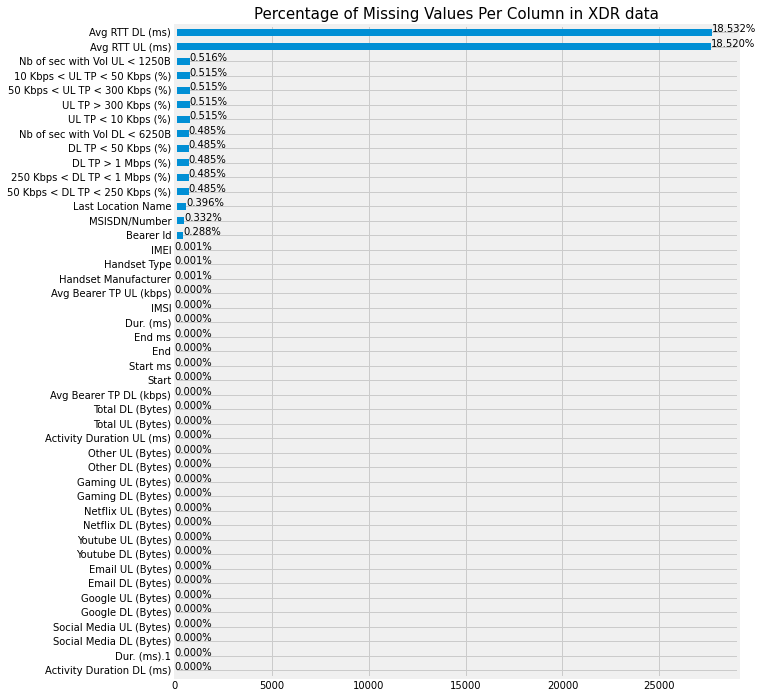

In [35]:
# Check the percentage of missing values in every column
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 12))
plt.title('Percentage of Missing Values Per Column in XDR data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

**Remove columns with >25% Missing values**

In [28]:
def removeMissingvalues(df:pd.DataFrame)-> pd.DataFrame:
    missing_ratio = df.isna().sum()/df.shape[0]

    # Below code gives list of columns having more than 25% nan
    col_to_drop = missing_ratio[missing_ratio>0.25].keys()

    df.drop(col_to_drop, axis=1,inplace=True)
    
    return df

In [29]:
df=removeMissingvalues(df)

In [31]:
# df.dropna(axis=0,subset=['Bearer Id'],inplace=True)
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)

In [32]:
df.shape

(149431, 45)

In [33]:
df.isna().sum()

Bearer Id                           430
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                       496
IMEI                                  2
Last Location Name                  592
Avg RTT DL (ms)                   27693
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 724
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [42]:
df.dtypes

Bearer Id                                 object
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [40]:
cols_numeric=df.columns.difference(['Bearer Id','Start','End','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()

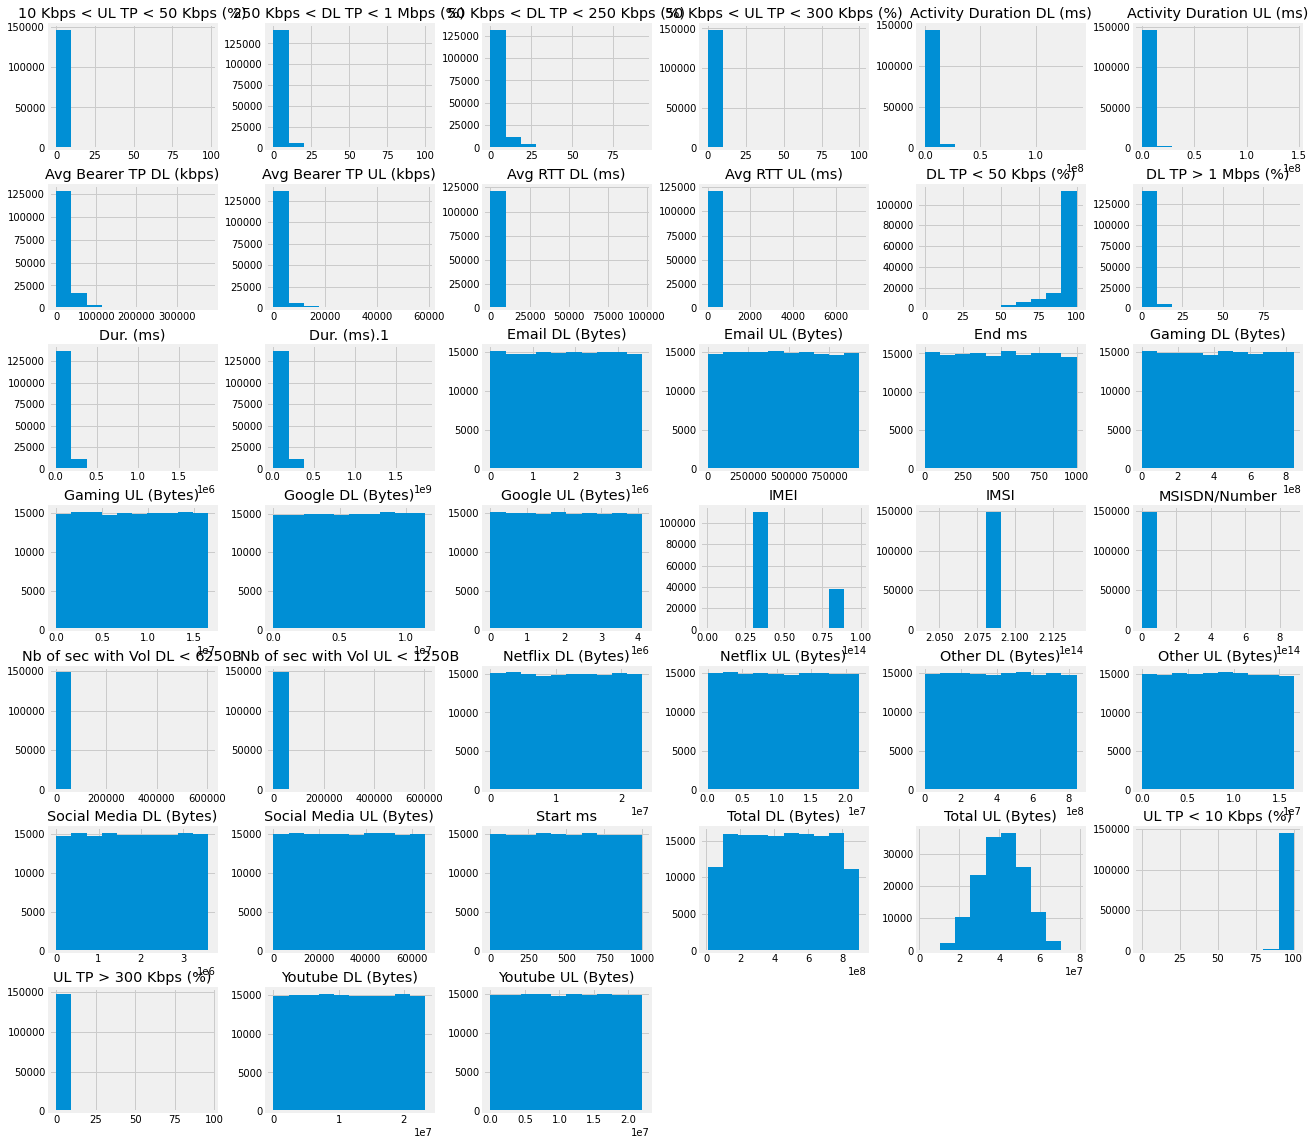

In [61]:
#Distribution of numeric variables
_=df[cols_numeric].hist(figsize=(20,20))

In [64]:
# # Fill in nmissing values using mean value or median value depending on the previous histogram
# skewed_cols=['UL TP < 10 Kbps (%)','UL TP > 300 Kbps (%)', 'Nb of sec with Vol UL < 1250B',
#              'Nb of sec with Vol DL < 6250B', 'MSISDN/Number','IMEI','IMSI', 'Dur. (ms)','Dur. (ms).1',
#              '10 Kbps < UL TP < 50 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','50 Kbps < DL TP < 250 Kbps (%)',
#              '50 Kbps < UL TP < 300 Kbps (%)','Activity Duration DL (ms)','Activity Duration UL (ms)','Avg Bearer TP DL (kbps)',
#              'Avg Bearer TP UL (kbps)','Avg RTT DL (ms)','Avg RTT UL (ms)','DL TP < 50 Kbps (%)','DL TP > 1 Mbps (%)']
# unskewed_cols=cols_numeric-skewed_cols

In [65]:
df.skew(axis=0,numeric_only=True)

Start ms                            0.001031
End ms                             -0.000927
Dur. (ms)                           3.958580
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    64.581111
Avg RTT UL (ms)                    28.432649
Avg Bearer TP DL (kbps)             2.588274
Avg Bearer TP UL (kbps)             4.501155
DL TP < 50 Kbps (%)                -2.297738
50 Kbps < DL TP < 250 Kbps (%)      3.270171
250 Kbps < DL TP < 1 Mbps (%)       4.570901
DL TP > 1 Mbps (%)                  5.365732
UL TP < 10 Kbps (%)                -8.987634
10 Kbps < UL TP < 50 Kbps (%)      10.948481
50 Kbps < UL TP < 300 Kbps (%)     21.861613
UL TP > 300 Kbps (%)               36.166957
Activity Duration DL (ms)           5.865786
Activity Duration UL (ms)           7.375312
Dur. (ms).1                         3.958580
Nb of sec with Vol DL < 6250B       9.034900
Nb of sec 

In [60]:
for col in cols_numeric:
    if df[col].skew() >=1 or df[col].skew() <=-1:
        df[col].fillna(df[col].median())
    elif:
        df[col].fillna(df[col].median())        

Start ms                            0.001031
End ms                             -0.000927
Dur. (ms)                           3.958580
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    64.581111
Avg RTT UL (ms)                    28.432649
Avg Bearer TP DL (kbps)             2.588274
Avg Bearer TP UL (kbps)             4.501155
DL TP < 50 Kbps (%)                -2.297738
50 Kbps < DL TP < 250 Kbps (%)      3.270171
250 Kbps < DL TP < 1 Mbps (%)       4.570901
DL TP > 1 Mbps (%)                  5.365732
UL TP < 10 Kbps (%)                -8.987634
10 Kbps < UL TP < 50 Kbps (%)      10.948481
50 Kbps < UL TP < 300 Kbps (%)     21.861613
UL TP > 300 Kbps (%)               36.166957
Activity Duration DL (ms)           5.865786
Activity Duration UL (ms)           7.375312
Dur. (ms).1                         3.958580
Nb of sec with Vol DL < 6250B       9.034900
Nb of sec 

In [66]:
df[cols_numeric[1]].mean()

1.7162810089639358

In [63]:
cols_numeric[1]

'250 Kbps < DL TP < 1 Mbps (%)'

**Drop Duplicates**

In [84]:
# df[df.duplicated(subset=['Bearer Id'],keep='first')].sort_values(by='Bearer Id')
df.drop_duplicates(subset=['Bearer Id','IMSI'],keep='first',inplace=True,ignore_index=True)

In [27]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str',errors='ignore').str.capitalize()
df['Handset Type'] = df['Handset Type'].astype('str',errors='ignore').str.capitalize()

#### top 10 handsets used by the customers

<AxesSubplot:>

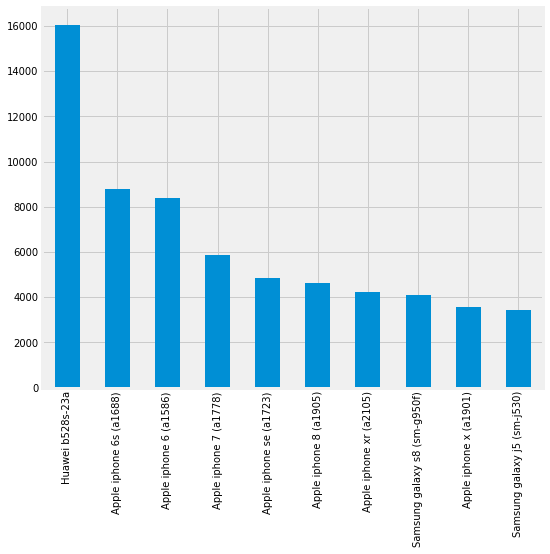

In [85]:
df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', figsize=(8, 7))

####  top 3 handset manufacturers

<AxesSubplot:>

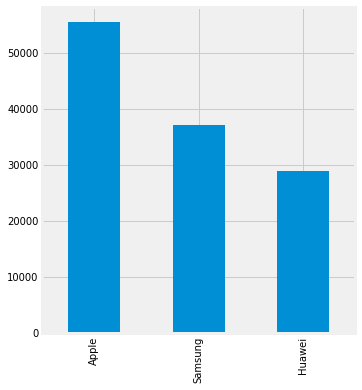

In [86]:
df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',figsize=(5, 6))

#### top 5 handsets per top 3 handset manufacturer

In [87]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [88]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 8798
                     Apple iphone 6 (a1586)                  8385
                     Apple iphone 7 (a1778)                  5861
                     Apple iphone se (a1723)                 4846
                     Apple iphone 8 (a1905)                  4629
Huawei               Huawei b528s-23a                       16038
                     Huawei p20 lite huawei nova 3e          1786
                     Huawei e5180                            1682
                     Huawei p20                              1311
                     Huawei y6 2018                           876
Samsung              Samsung galaxy s8 (sm-g950f)            4108
                     Samsung galaxy j5 (sm-j530)             3435
                     Samsung galaxy a5 sm-a520f              3386
                     Samsung galaxy j3 (sm-j330)             3139
                     Samsung galaxy s7 (sm-g930x)            2901

In [90]:
df.groupby('IMSI').aggregate({'Bearer Id':'count'})

,Bearer Id
IMSI,
2.040471e+14,1
2.040808e+14,1
2.082001e+14,1
2.082001e+14,1
2.082001e+14,2
...,...
2.082099e+14,1
2.082099e+14,1
2.082099e+14,1
